In [1]:
import dicom
from functools import reduce
from matplotlib import pyplot as plt
import numpy as np
from operator import add
from os import path
import pandas as pd
from PIL import Image
import random
import numpy as np
import _pickle

%matplotlib inline

In [2]:
filenames = !ls /home/a.kondyukov/data/Indianapolis_dicom/**/*.dcm

So, now let's choose several categories of images for further processing.

In [3]:
data_list = _pickle.load(open("../pickles/data_list", "rb"))

In [4]:
data_list[134]

{'MeSH': {'major': ['Diaphragm/right/elevated',
   'Opacity/lung/base/right',
   'Airspace Disease/lung/base/right',
   'Pulmonary Atelectasis/base/right'],
  'minor': []},
 'Problems': 'Diaphragm;Opacity;Airspace Disease;Pulmonary Atelectasis',
 'abstract': '<p><b>Comparison: </b>XXXX, XXXX.</p><p><b>Indication: </b>XXXX-year-old female shortness of breath. History of fibrosing mediastinitis.</p><p><b>Findings: </b>There is stable elevation of the right hemidiaphragm with questionable increased right basilar airspace opacities. The left lung is clear. Heart size normal. XXXX unremarkable.</p><p><b>Impression: </b>Stable elevated right hemidiaphragm with questionable subtle increased right basilar airspace disease/atelectasis. Correlate clinically.</p>',
 'affiliate': 'Indiana University',
 'articleType': 'rr',
 'authors': 'Kohli MD, Rosenman M',
 'ccLicense': 'byncnd',
 'detailedQueryURL': 'retrieve.php?img=CXR1064_IM-0045-1001&query=&fields=msh&it=x&coll=iu&req=4',
 'docSource': 'CXR

In [5]:
major_flat = reduce(add, [data["MeSH"]["major"] for data in data_list])

In [6]:
sel = np.array(["Calcinosis/aorta" in d["MeSH"]["major"] for d in data_list])

In [7]:
[v for v in pd.Series(major_flat).value_counts().index if "cardiomegaly" in v.lower()]

['Cardiomegaly',
 'Cardiomegaly/mild',
 'Cardiomegaly/borderline',
 'Cardiomegaly/moderate',
 'Cardiomegaly/severe']

In [8]:
[d["localFilename"] for d in data_list if "Cardiomegaly/mild" in d["MeSH"]["major"]]

['101/101_IM-0011-2001.dcm',
 '101/101_IM-0011-4004.dcm',
 '1014/1014_IM-0013-1001.dcm',
 '1014/1014_IM-0013-2001.dcm',
 '1013/1013_IM-0013-1001.dcm',
 '1013/1013_IM-0013-2001.dcm',
 '1031/1031_IM-0025-4004.dcm',
 '1053/1053_IM-0040-1001.dcm',
 '1053/1053_IM-0040-3003.dcm',
 '1105/1105_IM-0072-1001-0001.dcm',
 '1105/1105_IM-0072-1001-0002.dcm',
 '1129/1129_IM-0085-1001.dcm',
 '1158/1158_IM-0107-1001.dcm',
 '1158/1158_IM-0107-2001.dcm',
 '1170/1170_IM-0115-1001.dcm',
 '1170/1170_IM-0115-2001.dcm',
 '1170/1170_IM-0115-3001.dcm',
 '1204/1204_IM-0138-1001.dcm',
 '1204/1204_IM-0138-2001.dcm',
 '1230/1230_IM-0154-0001.dcm',
 '1230/1230_IM-0154-1001.dcm',
 '1230/1230_IM-0154-2001.dcm',
 '123/123_IM-0153-1001.dcm',
 '123/123_IM-0153-4004.dcm',
 '1257/1257_IM-0174-1001.dcm',
 '1257/1257_IM-0174-2001.dcm',
 '1261/1261_IM-0177-1001.dcm',
 '1261/1261_IM-0177-2001.dcm',
 '1286/1286_IM-0188-1002.dcm',
 '1273/1273_IM-0183-1001.dcm',
 '1273/1273_IM-0183-2001.dcm',
 '1343/1343_IM-0222-0001-0001.dcm',
 

In [9]:
d = dicom.read_file("/home/a.kondyukov/data/Indianapolis_dicom/1702/1702_IM-0463-1001.dcm").pixel_array

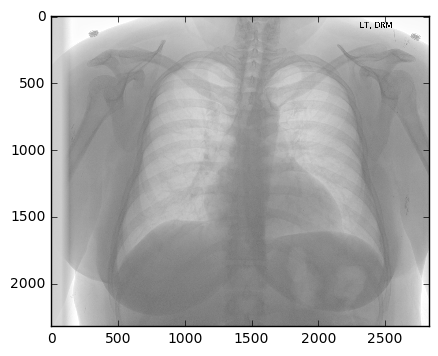

In [10]:
plt.set_cmap("gray")

plt.imshow(d)

In [11]:
d = dicom.read_file("/home/a.kondyukov/data/Indianapolis_dicom/1412/1412_IM-0262-1001.dcm")

The most obvious (though very useful) case is cardiomegaly, so write filenames of images with CM.

In [12]:
cardiomegaly_mild_indices = set([i for i, data in enumerate(data_list) if 
                       any(["cardiomegaly/mild" in s.lower() for s in data["MeSH"]["major"]])])

print(len(cardiomegaly_mild_indices))

245


In [13]:
cardiomegaly_modsev_indices = set([i for i, data in enumerate(data_list) if 
                       any(["cardiomegaly/moderate" in s.lower() or
                            "cardiomegaly/severe" in s.lower() for s in data["MeSH"]["major"]])])

print(len(cardiomegaly_modsev_indices))

61


Next case we are able to try to detect is toruous aorta

In [14]:
tort_aort_indices = set([i for i, data in enumerate(data_list) if 
                       any(["tortuous" in s.lower() and 
                            "aorta" in s.lower() for s in data["MeSH"]["major"]])])

print(len(tort_aort_indices))

453


Atherosclerosis.

In [15]:
atheros_indices = set([i for i, data in enumerate(data_list) if 
                       any(["atherosclerosis" in s.lower() for s in data["MeSH"]["major"]])])

print(len(atheros_indices))

233


Pleural effusion.

In [16]:
effusion_indices = set([i for i, data in enumerate(data_list) if 
                       any(["effusion" in s.lower() for s in data["MeSH"]["major"]])])

print(len(effusion_indices))

294


In [17]:
calcinosis_indices = set([i for i, data in enumerate(data_list) if 
                       any(["calcinosis/aorta" in s.lower() for s in data["MeSH"]["major"]])])

print(len(calcinosis_indices))

166


And control ones.

In [18]:
normal_indices = set([i for i, data in enumerate(data_list) if 
                       any(["normal" in s.lower() for s in data["MeSH"]["major"]])])

print(len(normal_indices))

2706


Here we choose examples with only one diagnosis.

In [19]:
chosen_indides = dict()

for s in [cardiomegaly_mild_indices, cardiomegaly_modsev_indices, 
          tort_aort_indices, atheros_indices, effusion_indices, normal_indices, calcinosis_indices]:
    for d in s:
        if d in chosen_indides:
            chosen_indides[d] += 1
        else:
            chosen_indides[d] = 1
            
duplicates = [k for k, v in chosen_indides.items() if v >= 2]

In [20]:
for s in [cardiomegaly_mild_indices, cardiomegaly_modsev_indices,
          tort_aort_indices, atheros_indices, effusion_indices, normal_indices, calcinosis_indices]:
    s.difference_update(duplicates)

In [21]:
cardiomegaly_mild_filenames = [data_list[i]["localFilename"] for i in cardiomegaly_mild_indices]
cardiomegaly_modsev_filenames = [data_list[i]["localFilename"] for i in cardiomegaly_modsev_indices]
tort_aort_filenames = [data_list[i]["localFilename"] for i in tort_aort_indices]
atheros_filenames = [data_list[i]["localFilename"] for i in atheros_indices]
effusion_filenames = [data_list[i]["localFilename"] for i in effusion_indices]
calcinosis_filenames = [data_list[i]["localFilename"] for i in calcinosis_indices]
normal_filenames = [data_list[i]["localFilename"] for i in normal_indices]

In [103]:
!mkdir /home/a.kondyukov/data/Indianapolis_png

In [104]:
!mkdir /home/a.kondyukov/data/Indianapolis_png/cardiomegaly_mild
!mkdir /home/a.kondyukov/data/Indianapolis_png/cardiomegaly_modsev
!mkdir /home/a.kondyukov/data/Indianapolis_png/calcinosis
!mkdir /home/a.kondyukov/data/Indianapolis_png/torture_aorta
!mkdir /home/a.kondyukov/data/Indianapolis_png/atherosclerosis
!mkdir /home/a.kondyukov/data/Indianapolis_png/pleural_effusion
!mkdir /home/a.kondyukov/data/Indianapolis_png/normal

In [107]:
"/home/a.kondyukov/data/Indianapolis_png/cardiomegaly_mild/{}.png".format(new_f)

'/home/a.kondyukov/data/Indianapolis_png/cardiomegaly_mild/2494_IM-1020-1001.dcm.png'

In [26]:
np.where(["1065" in s for s in atheros_filenames])

(array([42, 43]),)

In [27]:
atheros_filenames[42]

'1065/1065_IM-0046-1001.dcm'

In [22]:
dicom.read_file('/home/a.kondyukov/data/Indianapolis_dicom/1065/1065_IM-0046-1001.dcm')

LookupError: unknown encoding: ISO 2022 IR 6

In [110]:
for f in cardiomegaly_mild_filenames:
    new_f = path.split(f)[1]
    arr = dicom.read_file(path.join("/home/a.kondyukov/data/Indianapolis_dicom/", f)).pixel_array
    plt.imsave("/home/a.kondyukov/data/Indianapolis_png/cardiomegaly_mild/{}.png".format(new_f), arr)

In [111]:
for f in cardiomegaly_modsev_filenames:
    new_f = path.split(f)[1]
    arr = dicom.read_file(path.join("/home/a.kondyukov/data/Indianapolis_dicom/", f)).pixel_array
    plt.imsave("/home/a.kondyukov/data/Indianapolis_png/cardiomegaly_modsev/{}.png".format(new_f), arr)

In [ ]:
for f in tort_aort_filenames:
    new_f = path.split(f)[1]
    arr = dicom.read_file(path.join("/home/a.kondyukov/data/Indianapolis_dicom/", f)).pixel_array
    plt.imsave("/home/a.kondyukov/data/Indianapolis_png/torture_aorta/{}.png".format(new_f), arr)

In [33]:
for f in atheros_filenames:
    new_f = path.split(f)[1]
    arr = dicom.read_file(path.join("/home/a.kondyukov/data/Indianapolis_dicom/", f)).pixel_array
    plt.imsave("/home/a.kondyukov/data/Indianapolis_png/atherosclerosis/{}.png".format(new_f), arr)

/home/a.kondyukov/data/Indianapolis_dicom/1065/1065_IM-0046-1001.dcm


In [ ]:
for f in calcinosis_filenames:
    new_f = path.split(f)[1]
    arr = dicom.read_file(path.join("/home/a.kondyukov/data/Indianapolis_dicom/", f)).pixel_array
    plt.imsave("/home/a.kondyukov/data/Indianapolis_png/calcinosis/{}.png".format(new_f), arr)

In [ ]:
for f in normal_filenames:
    new_f = path.split(f)[1]
    arr = dicom.read_file(path.join("/home/a.kondyukov/data/Indianapolis_dicom/", f)).pixel_array
    plt.imsave("/home/a.kondyukov/data/Indianapolis_png/normal/{}.png".format(new_f), arr)

And finally, let's convert all images we need to TIFF format.

In [25]:
all_sets_filenames = !ls /home/a.kondyukov/data/Indianapolis_sorted/**/*.dcm

In [33]:
dicom.read_file(all_sets_filenames[0]).pixel_array.shape

(2968, 2456)

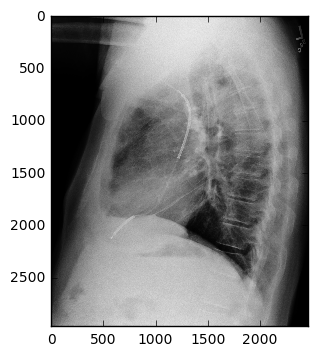

In [32]:
plt.set_cmap("gray")

plt.imshow(dicom.read_file(all_sets_filenames[0]).pixel_array);

In [38]:
i = dicom.read_file("/home/a.kondyukov/data/Indianapolis_dicom/1/1_IM-0001-3001.dcm").pixel_array

In [39]:
i.shape

(2828, 2320)

In [41]:
all_sets_filenames = !ls /home/a.kondyukov/data/Indianapolis_sorted/**/*.dcm

for filename in all_sets_filenames:
    array = dicom.read_file(filename).pixel_array
    plt.imsave(filename.replace("sorted", "sorted_tiff").replace("dcm", "tiff"), array, cmap=plt.cm.gray)
    
    print(filename)
    break

/home/a.kondyukov/data/Indianapolis_sorted/atherosclerosis/104_IM-0031-0001-0002.dcm


In [46]:
folders = !ls /home/a.kondyukov/data/Indianapolis_sorted/

In [64]:
import pylab as pl
from sklearn.cross_validation import train_test_split
from IPython import display

/home/a.kondyukov/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
from PIL import Image

for folder in folders:
    filenames = !ls /home/a.kondyukov/data/Indianapolis_sorted/$folder/*.dcm
    
    idx = np.random.choice(np.arange(len(filenames)), 50, replace=False)
    
    for i in idx:
        img = dicom.read_file(filenames[i]).pixel_array
        
        im = Image.fromarray(img)
        f = "/home/a.kondyukov/data/Indianapolis_sorted_tiff_new/"
        im.save((f + path.split(filename)[1]).replace("dcm", "tiff"))
        print(img.shape)
        
        pl.imshow(img);
        display.clear_output(wait=True)
        display.display(pl.gcf())

        ff = input()
        if ff == "y":
            pass
        else:
            break
        
    break

In [62]:
dicom.read_file("/home/a.kondyukov/data/Indianapolis_dicom/23/23_IM-0879-1001.dcm")

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY', '', 'CSA RESAMPLED']
(0008, 0016) SOP Class UID                       UI: Computed Radiography Image Storage
(0008, 0018) SOP Instance UID                    UI: 9999.207947404580043264285949980101885023368
(0008, 0020) Study Date                          DA: '20120315'
(0008, 0023) Content Date                        DA: '20120315'
(0008, 0030) Study Time                          TM: ''
(0008, 0033) Content Time                        TM: ''
(0008, 0050) Accession Number                    SH: '2108443376415971'
(0008, 0060) Modality                            CS: 'CR'
(0008, 0070) Manufacturer                        LO: ''
(0008, 0090) Referring Physician's Name          PN: ''
(0010, 0010) Patient's Name                      PN: '23'
(0010, 0020) Patient ID                          LO: '23'
(0010, 0030) Patient's Birth Date                DA

In [54]:
print(idx)

[160 226  30 292 284 133  58 134 283 101 243  47  94 210  79 111  28 273
  93 224  51  59 237 209  33 291  83   1 293 156 245 215 232  53 275 252
   0  87  52 124 280 287 172 130  21  75 294 212 244 105]


In [42]:
img = plt.imread("/home/a.kondyukov/data/Indianapolis_sorted_tiff/atherosclerosis/104_IM-0031-0001-0002.tiff")

In [43]:
img.shape

(2968, 2456, 4)

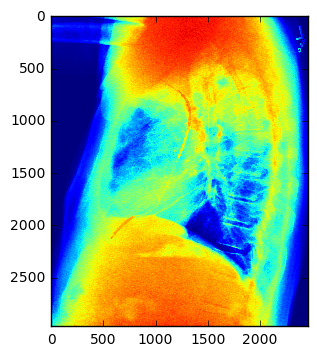

In [35]:
plt.imshow(img)

In [185]:
f = np.load("/home/a.kondyukov/data/lungs/TbDispensary/lungs_masks/lungs_mask_001.npz")

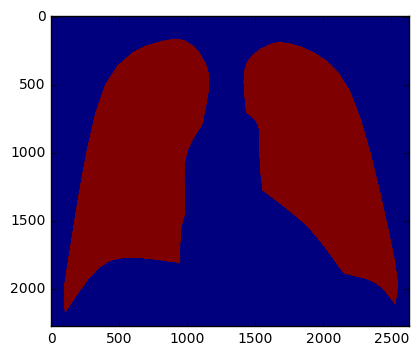

In [188]:
plt.imshow(f["arr_0"])

In [189]:
import json

In [192]:
j = json.load(open("/home/a.kondyukov/data/whole/TbDispensary/image001.json", "r"))

In [206]:
xs_l = np.array(j["LeftLungContour"]["XCoordinates"])
ys_l = np.array(j["LeftLungContour"]["YCoordinates"])
iskey_l = np.array(j["LeftLungContour"]["KeyPoints"])

xs_r = np.array(j["RightLungContour"]["XCoordinates"])
ys_r = np.array(j["RightLungContour"]["YCoordinates"])
iskey_r = np.array(j["RightLungContour"]["KeyPoints"])

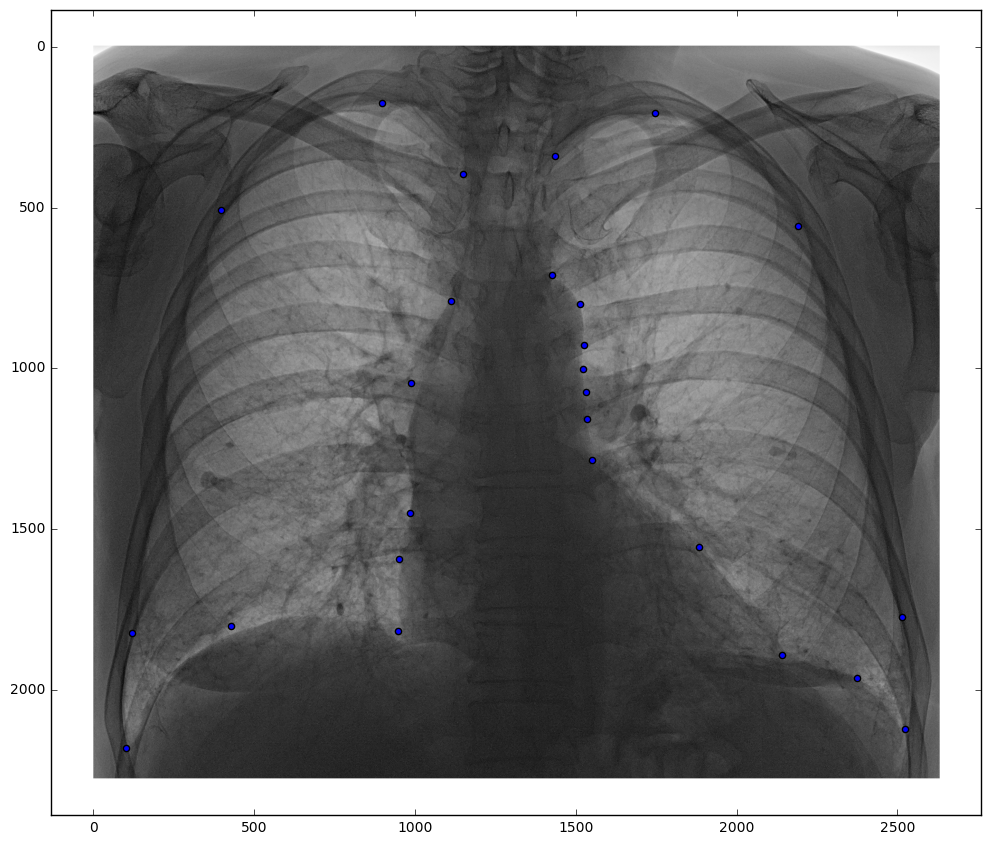

In [211]:
plt.figure(figsize=(12, 12))
plt.set_cmap("gray")

plt.imshow(dicom.read_file("/home/a.kondyukov/data/whole/TbDispensary/image001.dcm").pixel_array)
plt.scatter(xs_l[iskey_l], ys_l[iskey_l])
plt.scatter(xs_r[iskey_r], ys_r[iskey_r])